In [1]:
!git clone https://github.com/openai/CLIP.git
%cd CLIP/
%pip install ftfy
import clip
%cd ../

fatal: destination path 'CLIP' already exists and is not an empty directory.
/home/ubuntu/isa_CSC413_project/CLIP


Looking in indexes: https://pypi.internal-mirrors.ucloud.cn/simple
Note: you may need to restart the kernel to use updated packages.
/home/ubuntu/isa_CSC413_project


In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
%pip install huggingface_hub

Looking in indexes: https://pypi.internal-mirrors.ucloud.cn/simple
Note: you may need to restart the kernel to use updated packages.


# Load the diffuser model


In [4]:
%%capture
%pip install -U peft transformers diffusers

In [20]:
from diffusers import DiffusionPipeline

# Load Stable Diffusion XL Base1.0
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

# Optional CPU offloading to save some GPU Memory
pipe.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


In [27]:
# Invoke pipeline to generate image
prompt = "A Genshin character girl with long white hair and blue eyes, intricate fantasy armor, standing in a mystical forest, highly detailed, digital art"

image = pipe(
    prompt = prompt
).images[0]

100%|██████████| 50/50 [00:06<00:00,  7.71it/s]
/home/ubuntu/anaconda3/envs/isaenv/lib/python3.12/site-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


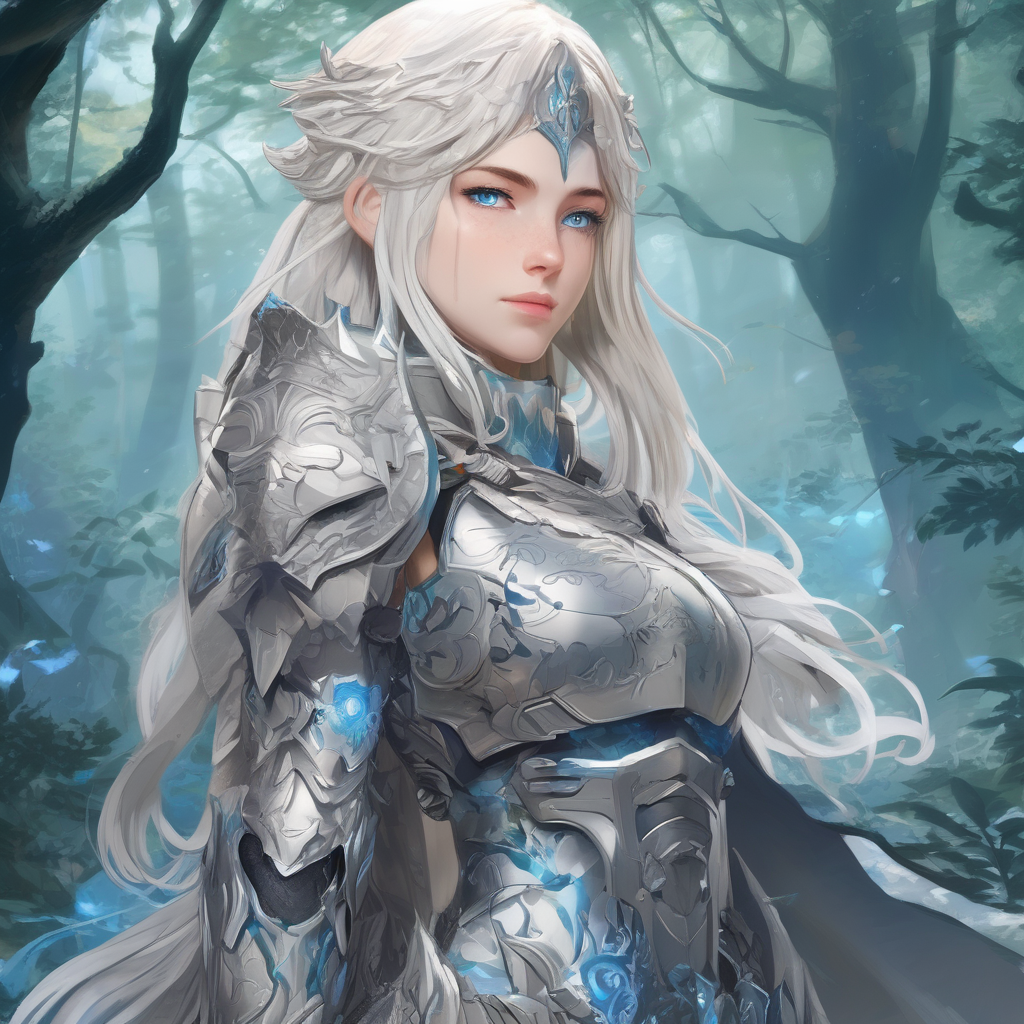

: 

In [ ]:
image

In [38]:
# Save Image
image.save(f"{prompt}_projector.png")

# Something else

In [ ]:
def precision(model, dataset):
    """
    Compute the precision of `model` over the `dataset`.  We will take the
    **most probable class** as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """
    true_pos, total_pred_pos = 0, 0
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = torch.sigmoid(z) > 0.5 # TODO: pred should be a [N, 1] tensor with binary
                    # predictions, (0 or 1 in each entry)

        yt = y + t
        true_pos += int(torch.sum(yt == 2))
        total_pred_pos += int(torch.sum(y == 1))

        # TODO: update total_pred_pos and true_pos
    return true_pos / total_pred_pos


def recall(model, dataset):
    """
    Compute the recall (or sensitivity) of `model` over the `dataset`.  We will
    take the **most probable class** as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """
    true_pos, total_actual_pos = 0, 0 # track the true and false positive
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = torch.sigmoid(z) > 0.5 # TODO: pred should be a [N, 1] tensor with binary
                    # predictions, (0 or 1 in each entry)

        yt = y + t
        true_pos += int(torch.sum(yt == 2))
        total_actual_pos += int(torch.sum(t == 1))

        # TODO: update total_pos and true_pos
    return true_pos / total_actual_pos

print("Precision(Training)", precision(model, train_data))
print("Recall(Training)", recall(model, train_data))
print("Precision(Validation)", precision(model, val_data))
print("Recall(Validation)", recall(model, val_data))

In [ ]:
m_once = MLPModel()
train_model(m_once, train_data, val_data, learning_rate=0.5, batch_size=500, num_epochs=1)
print("Training Accuracy:", accuracy(m_once, train_data))
print("Validation Accuracy:", accuracy(m_once, val_data))
z = model(X.view(-1, 784))
y = torch.sigmoid(z)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_prediction(model, data, sample=1000):
    loader = torch.utils.data.DataLoader(data, batch_size=sample, shuffle=True)
    for X, t in loader:
        z = model(X.view(-1, 784))
        y = torch.sigmoid(z)
        break
    y = y.detach().numpy()
    t = t.detach().numpy()
    return y, t

y, t = get_prediction(model, val_data)
y = y > 0.5
cm = confusion_matrix(t, y)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot()
plt.title("Confusion Matrix (Val Data)")

In [ ]:
m_once = MLPModel()
train_model(m_once, train_data, val_data, learning_rate=0.5, batch_size=500, num_epochs=1)
print("Training Accuracy:", accuracy(m_once, train_data))
print("Validation Accuracy:", accuracy(m_once, val_data))

y, t = get_prediction(m_once, val_data)
y = y > 0.5
ConfusionMatrixDisplay(confusion_matrix(t, y), display_labels=["0", "1"]).plot()
plt.title("Confusion Matrix (Val Data)")